# Ground State Chemical Potential and Energy

## 1. Chemical Potential as a function of the Density in 1D

### 1.1 Set up

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def eps_k(t, k):                    # kinetic energy eigenvalues
    return -2 * t * np.cos(k)

def theta(x):                       # step function theta
    if x < 0:
        return 0
    else:
        return 1 

### 1.2 Density integration and inversion

#### 1.2.1 Functions to execute integration

In [4]:
# define the integrand of the integration for the density
def rho_integrand(U, t, k, mu):
    if U >= 0:
        return (theta(mu - eps_k(t, k)) + theta(mu - eps_k(t, k) - U)) / (2 * np.pi)
    elif U < 0:
        return (2 * theta(mu - eps_k(t, k) - (U / 2))) / (2 * np.pi)

def find_values_for_rho(U, t, no_of_points, integration_points, mu_array):
    # define the integration space [-pi, pi]
    k_array = np.linspace(-np.pi, np.pi, integration_points)

    # define the array in which the values for rho will be stored in, this will be the return value
    rho_array = np.empty(no_of_points)  
  
    # calculate the integral (4.7) for all values in mu_array
    for i in range(no_of_points):
        # calculate the integrand for the given mu
        integrand = np.empty(integration_points)
        for k_index in range(integration_points):
            integrand[k_index] = rho_integrand(U, t, k_array[k_index], mu_array[i])
        
        # calculate the integral to find the rho that corresponds to the chosen mu in mu_index
        rho_array[i] = np.trapezoid(integrand, k_array)
        
    return rho_array

#### 1.2.2 Execution of integration

##### U = t case

In [15]:
# Hamiltonian constants
t = 1   # hopping integral
U = t   # interaction energy

# Numerical constants
no_of_points = 1000           # Number of points to evaluate mu and rho at
integration_point = 1000     # Number of points to execute integration for

# Create values for chemical potential  
mu_array = np.linspace(-2, 3, no_of_points)   
# Calculate corresponding values for the density
rho_array = find_values_for_rho(U, t, no_of_points, integration_point, mu_array)

##### U = 8t case

In [6]:
# Create values for chemical potential  
mu_array_8t = np.linspace(-2, 10, no_of_points)   
# Calculate corresponding values for the density
rho_array_8t = find_values_for_rho(8 * U, t, no_of_points, integration_point, mu_array_8t)

#### U = -t case

In [26]:
# Create values for chemical potential  
mu_array_neg = np.linspace(-2, 6, no_of_points)   
# Calculate corresponding values for the density
rho_array_neg = find_values_for_rho(4*U, t, no_of_points, integration_point, mu_array_neg)

In [49]:
def rho_ana_hk(U, t, mu):
    return 2 - ((np.heaviside((mu - U)/(2*t), 1.0) - np.heaviside((mu - U)/(2*t) - 1, 1.0)) * np.arccos((mu - U)/(2*t)) 
                 + (np.heaviside(mu/(2*t), 1.0) - np.heaviside(mu/(2*t) - 1, 1.0)) * np.arccos(mu/(2*t)))/ np.pi


def rho_ana_me(U, t, mu):
    return (np.heaviside(mu - 2*t, 1.0) + np.heaviside(mu - U - 2*t, 1.0) 
            + 2 * t * ((np.heaviside((mu - U)/(2*t) + 1, 1.0) - np.heaviside((mu - U)/(2*t) - 1, 1.0)) 
                       * np.arccos(-(mu - U)/(2*t)) 
                       + (np.heaviside((mu)/(2*t) + 1, 1.0) - np.heaviside((mu)/(2*t) - 1, 1.0)) 
                       * np.arccos(-mu/(2*t))) / np.pi)

### 1.3 Plotting

/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_5355/1776718496.py:2: RuntimeWarning: invalid value encountered in arccos
  return 2 - ((np.heaviside((mu - U)/(2*t), 1.0) - np.heaviside((mu - U)/(2*t) - 1, 1.0)) * np.arccos((mu - U)/(2*t))
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_5355/1776718496.py:3: RuntimeWarning: invalid value encountered in arccos
  + (np.heaviside(mu/(2*t), 1.0) - np.heaviside(mu/(2*t) - 1, 1.0)) * np.arccos(mu/(2*t)))/ np.pi


[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

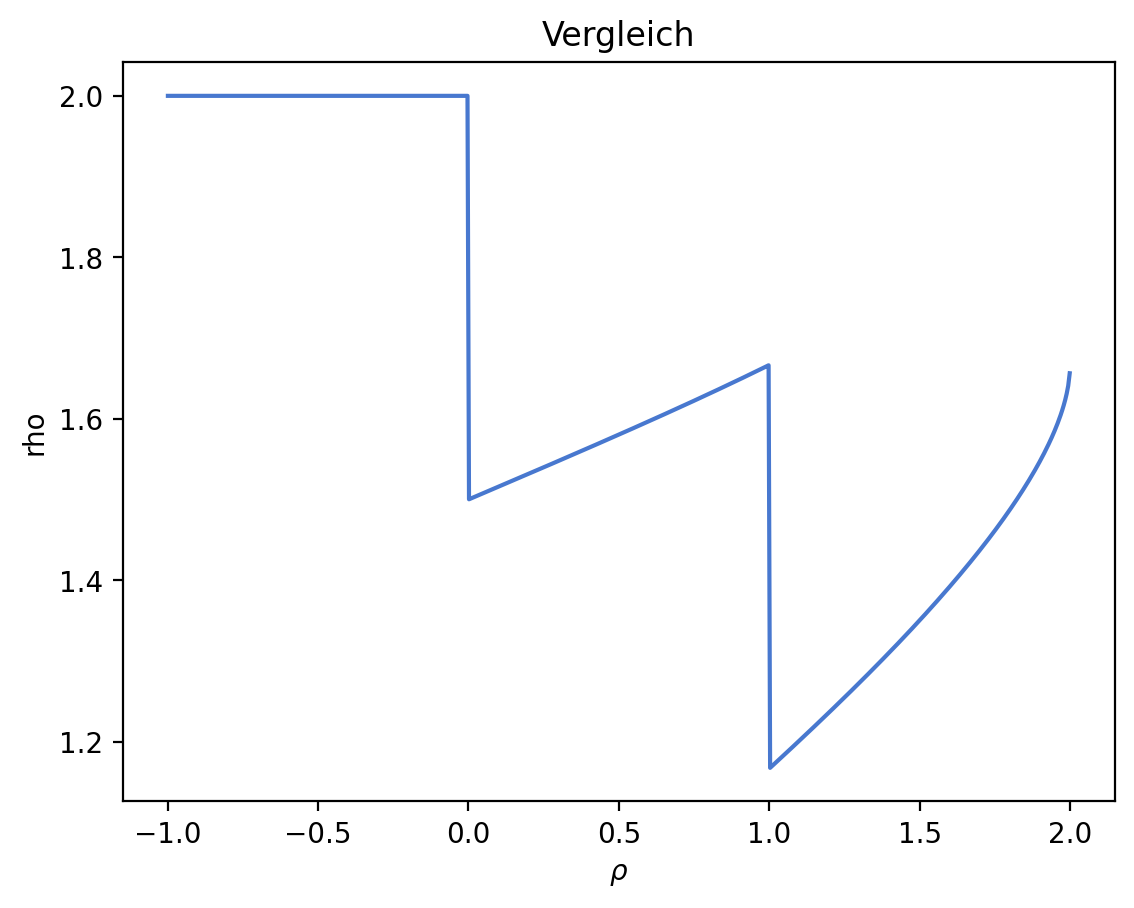

In [55]:
def one_plot(x_array, y_array, y_label, title):
    plt.figure(dpi=200)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(r'$\rho$')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
def two_plots(x_array_1, x_array_2, y_array_1, y_array_2, title, title_1, title_2, y_label):
    # Create side-by-side subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=200)
    plt.style.use('seaborn-v0_8-pastel')
    
    # Plot 1
    axes[0].plot(x_array_1, y_array_1)
    axes[0].set_title(title_1)
    axes[0].set_xlabel(r'$\rho$')
    axes[0].set_ylabel(y_label)
    axes[0].grid(True)
    
    # Plot 2
    axes[1].plot(x_array_2, y_array_2)
    axes[1].set_title(title_2)
    axes[1].set_xlabel(r'$\rho$')
    axes[1].set_ylabel(y_label)
    axes[1].grid(True)
    
    fig.suptitle(title, weight='bold')
    
    # Layout adjustment
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)  # increase this value for more space
    plt.show()
    
def both_graphs_in_one(x_array_1, x_array_2, y_array_1, y_array_2, title_1, y_label):
    plt.figure(dpi=200)
    plt.style.use('seaborn-v0_8-muted')
    
    # Plot erstellen
    plt.plot(x_array_1, y_array_1, linestyle='-', label=r'$U = t$')
    plt.plot(x_array_2, y_array_2, linestyle='-', label=r'$U = 8t$')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(r'$\rho$')
    plt.ylabel(y_label)
    plt.title(title_1, weight='bold')
    plt.legend(loc='best', frameon=True, fontsize=10)
    plt.show()
    
#one_plot(rho_array, mu_array, 'U = t')
#one_plot(rho_array_8t, mu_array_8t, 'U = 8t')
#two_plots(rho_array, rho_array_8t, mu_array, mu_array_8t,'Ground State Chemical Potential', r'$U = t$', r'$U = 8t$', r'$\mu$')
#both_graphs_in_one(rho_array, rho_array_8t, mu_array, mu_array_8t, "Ground State Chemical Potential", r'$\mu$')
#one_plot(rho_array_neg, mu_array_neg, r'$\mu$', r'$U = -t$')

# 2 Energy Density as a function of the density in 1D

## 2.1 Energy integration and inversion

In [9]:
# define the integrand of the integration for the energy
def energy_integrand(U, t, k, mu):
    if U >= 0:
        return (eps_k(t, k) * theta(mu - eps_k(t, k)) + ((eps_k(t, k) + U) * theta(mu - eps_k(t, k) - U))) / (2 * np.pi)
    elif U < 0:
        return ((2 * eps_k(t, k) + U) * theta(mu - eps_k(t, k) - (U / 2))) / (2 * np.pi)
    
def find_values_for_energy(U, t, no_of_points, integration_points, mu_array):
    # define the integration space [-pi, pi]
    k_array = np.linspace(-np.pi, np.pi, integration_points)

    # define the array in which the values for rho will be stored in, this will be the return value
    energy_array = np.empty(no_of_points)  
  
    # calculate the integral (4.7) for all values in mu_array
    for i in range(no_of_points):
        # calculate the integrand for the given mu
        integrand = np.empty(integration_points)
        for k_index in range(integration_points):
            integrand[k_index] = energy_integrand(U, t, k_array[k_index], mu_array[i])
        
        # calculate the integral to find the rho that corresponds to the chosen mu in mu_index
        energy_array[i] = np.trapezoid(integrand, k_array)
        
    return energy_array, integrand

### 2.1.1 Integration execution & Plotting

In [10]:
energy_array, integrand_array = find_values_for_energy(U, t, no_of_points, integration_point, mu_array)
energy_array_8t, integrand_array_8t = find_values_for_energy(8 * U, t, no_of_points, integration_point, mu_array_8t)
energy_array_neg, integrand_array_neg = find_values_for_energy(-U, t, no_of_points, integration_point, mu_array_neg)

In [11]:
#two_plots(rho_array, rho_array_8t, integrand_array, integrand_array_8t, r'$U = t$', r'$U = 8t$', r'Integrand of $e$')

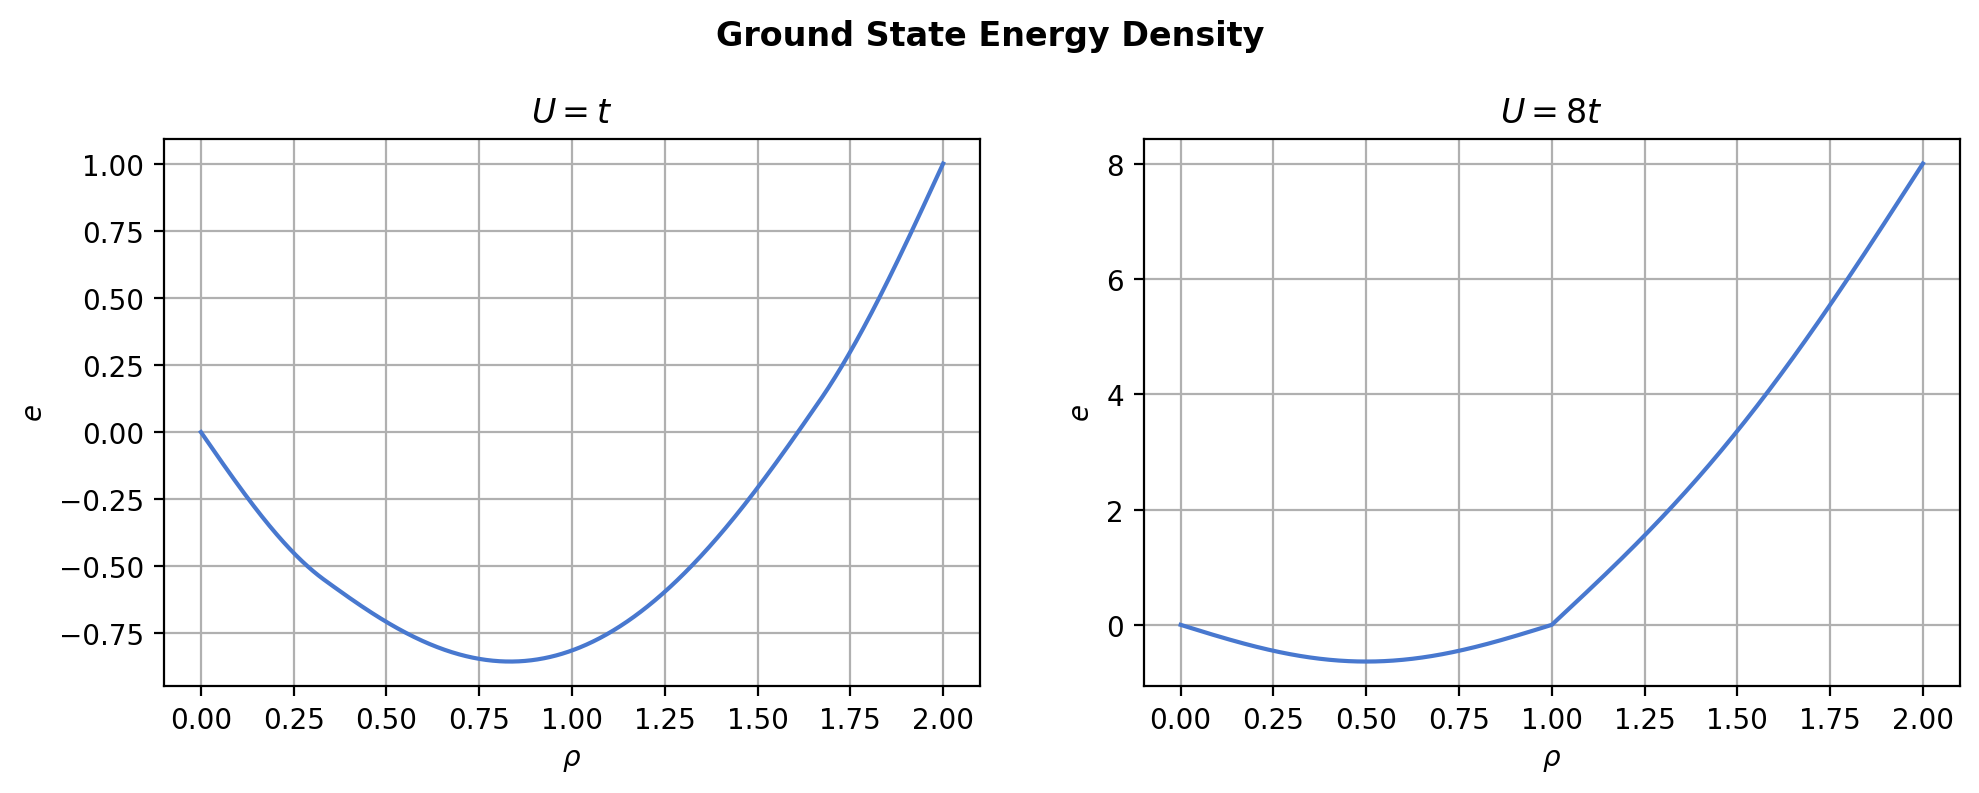

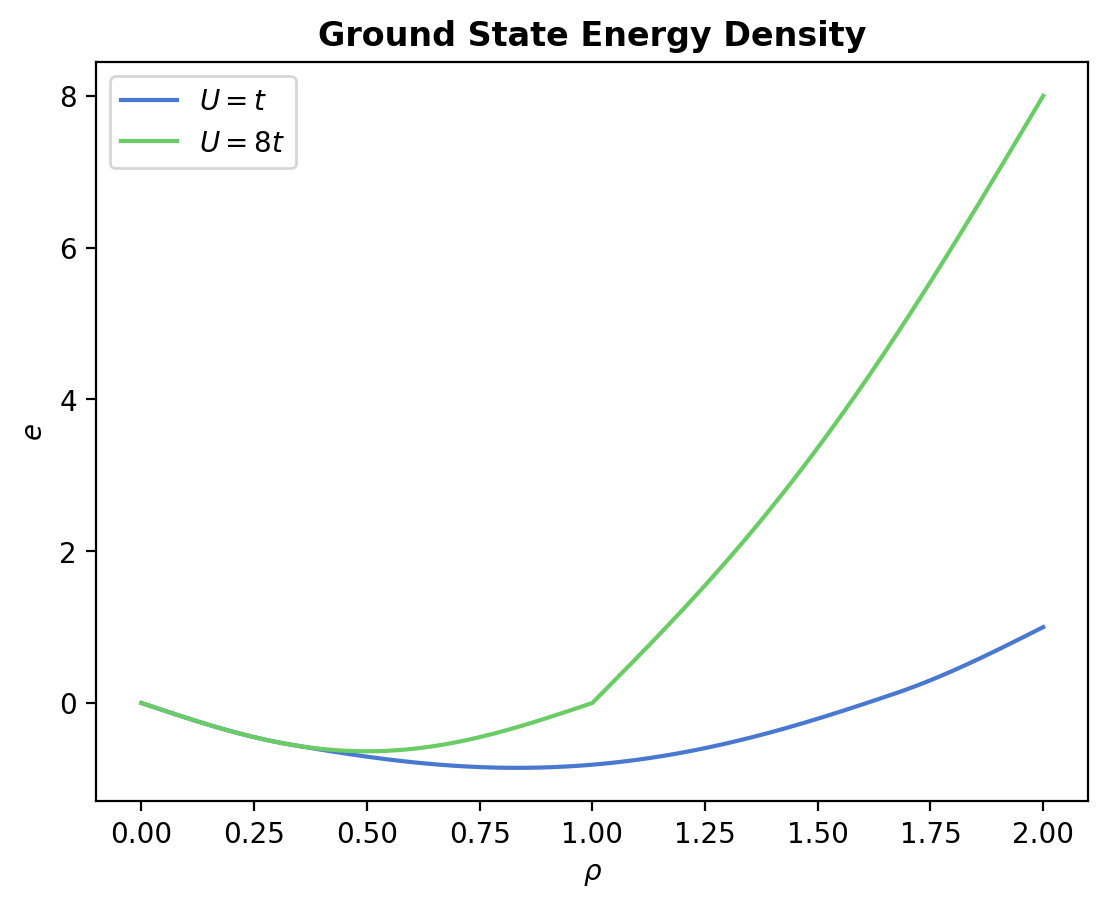

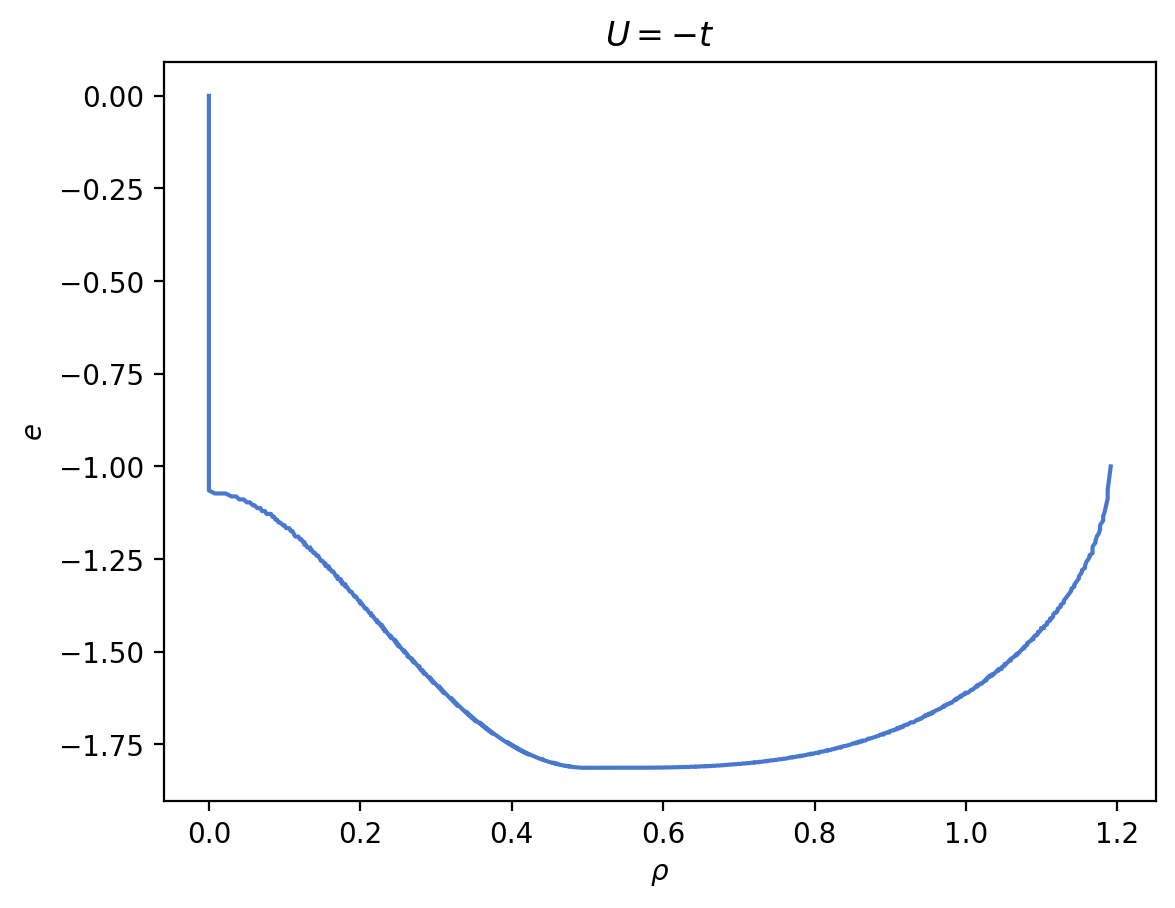

In [12]:
two_plots(rho_array, rho_array_8t, energy_array, energy_array_8t, 'Ground State Energy Density', r'$U = t$', r'$U = 8t$', r'$e$')
both_graphs_in_one(rho_array, rho_array_8t, energy_array, energy_array_8t, 'Ground State Energy Density', r'$e$')
one_plot(rho_array_neg, energy_array_neg, r'$e$', r'$U = -t$')